# ECE-GY 6143 Assignment 2
## Guandong Kou (gk1675)

In [1]:
run styles.ipynb

## Problem 2

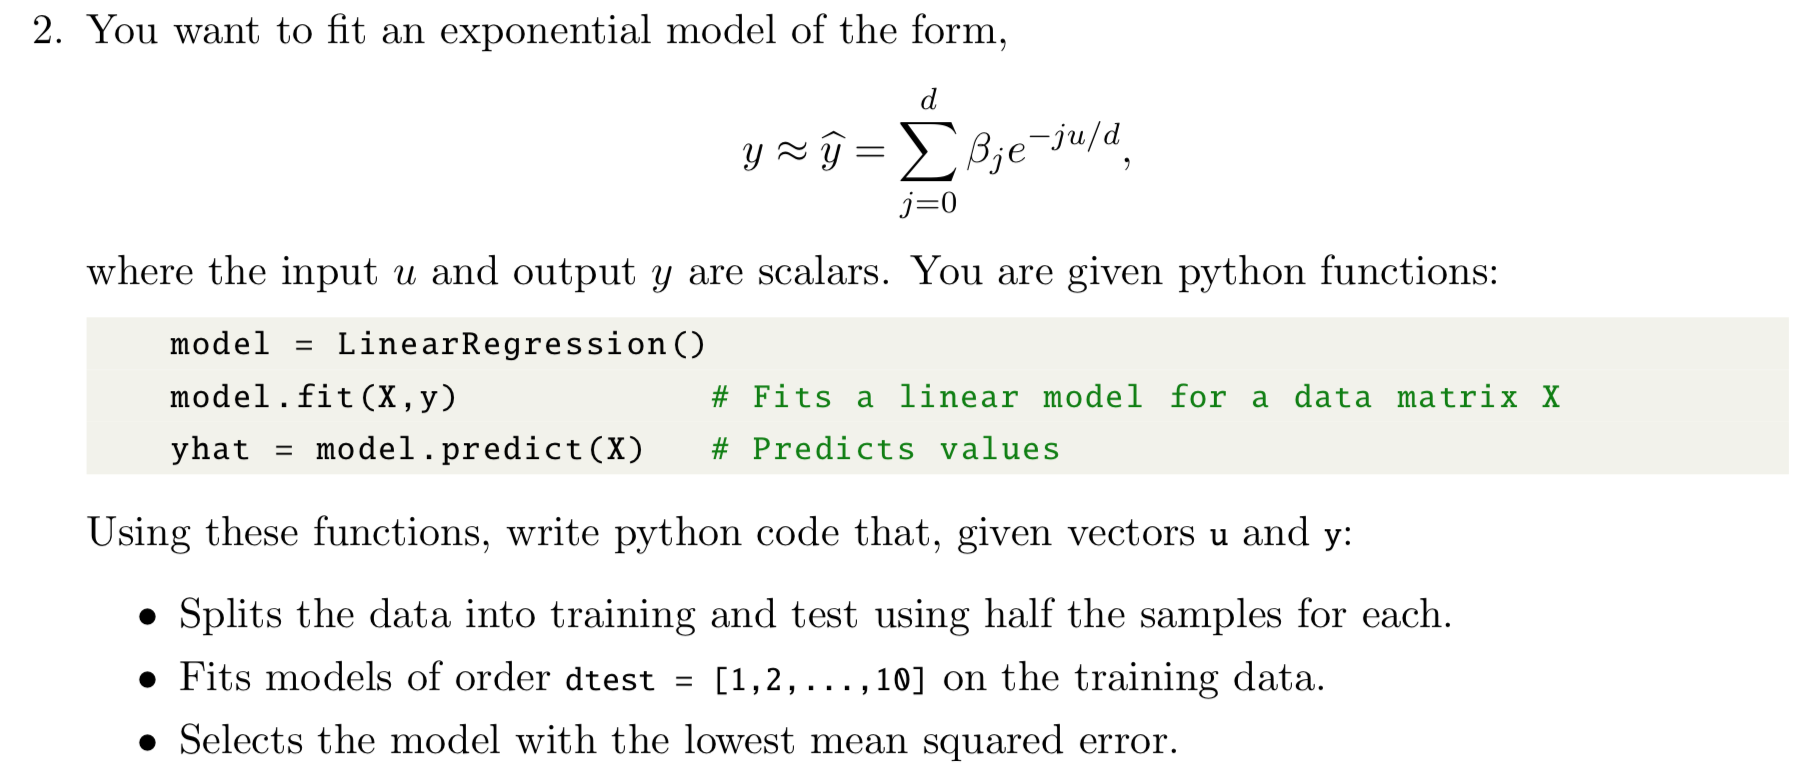

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.style.use('ggplot')
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [66]:
def u2y(u, d, beta):
    return sum(beta[j] *np.exp(-j*u/d) for j in range(d+1))

In [67]:
n_samples = 100
u = np.random.random(n_samples) * 10
dmax = 10
beta = np.random.random(dmax+1)
y = u2y(u, dmax, beta) + np.random.random(n_samples) * 2

In [69]:
utr, uts, ytr, yts = train_test_split(u, y)

In [87]:
dtest = np.arange(2, dmax+1)
rss = []
for d in dtest:
    curr_x = np.array([u2y(utr, d, beta)]).reshape((len(utr), 1))
    model = LinearRegression()
    model.fit(curr_x, ytr.reshape((len(utr), 1)))
    yhat = model.predict(uts.reshape((len(uts), 1)))
    curr_rss = np.sum((yhat - yts)**2) / len(yts)
    rss.append(curr_rss)

degree of model with the lowest mean squared error

In [94]:
dtest[np.argmin(rss)]

10

## Problem 3

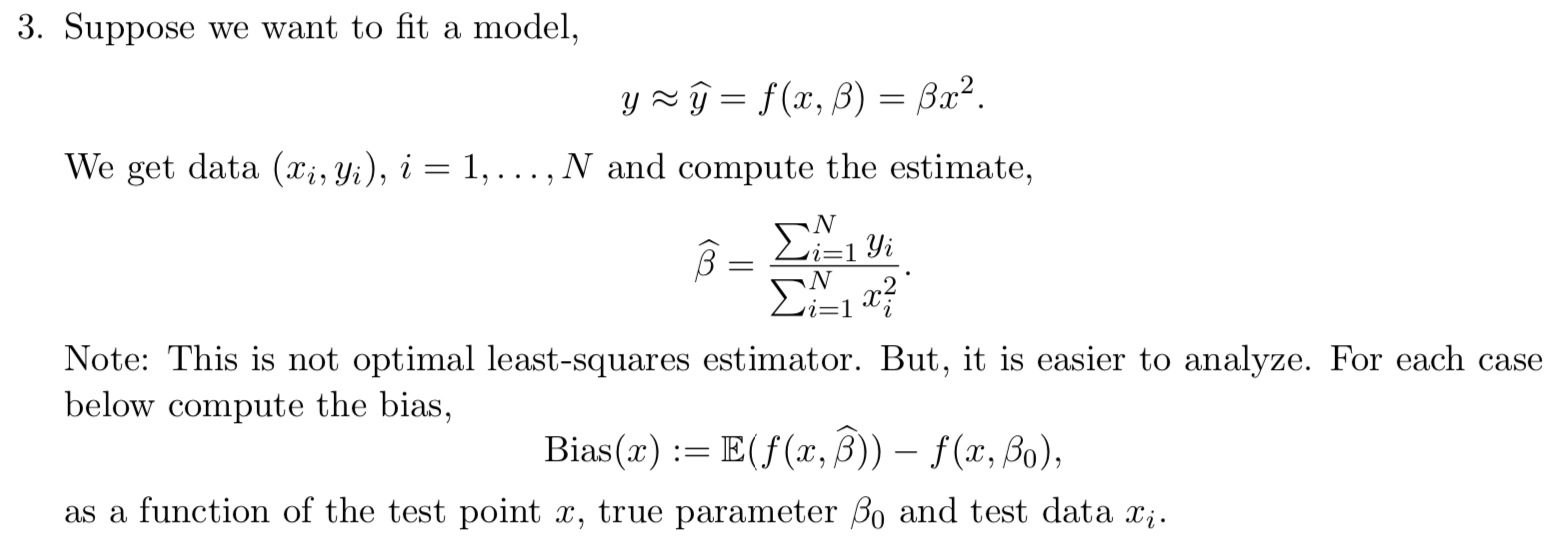

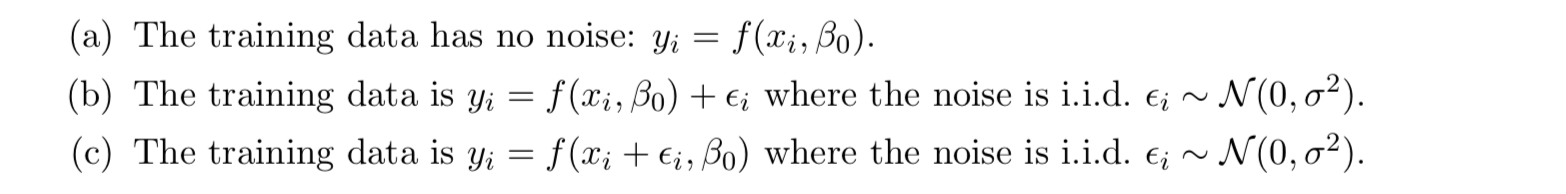

$$
\text{Bias}(x) = E[f(x, \hat{\beta})] - f(x, \beta_0) \tag{2-1} \\
= E\left(\hat{\beta} x^2 \right) - \beta_0 x^2  \\
= E\left(\frac{\sum_{i=1}^N y_i}{\sum_{i=0}^N x_i^2} x^2 \right) - \beta_0 x^2  \\
$$

### 3a)
From formula (2-1), and $ x_i = f(x_i, \beta_0) = \beta_0 x_i^2 $,
$$
\text{Bias}(x) = E\left(\frac{\sum_{i=1}^N \beta_0 x_i^2}{\sum_{i=0}^N x_i^2}  x^2 \right) - \beta_0 x^2 \\
= \beta_0 x^2 - \beta_0 x^2 \\
= 0
$$

### 3b)
From formula (2-1), and $ x_i = f(x_i, \beta_0) + \epsilon_i = \beta_0 x_i^2 + \epsilon_i$ and $ E(\epsilon_i) = 0 $,
$$
\text{Bias}(x) = E\left(\frac{\sum_{i=1}^N \beta_0 x_i^2 + \epsilon_i}{\sum_{i=0}^N x_i^2} x^2 \right) - \beta_0 x^2 \\
= E(\sum_{i=1}^N \epsilon_i  x^2) + \beta_0 x^2 - \beta_0 x^2 \\
= 0
$$

### 3c)
From formula (2-1), and $ x_i = f(x_i + \epsilon_i, \beta_0) = \beta_0 (x_i+ \epsilon_i)^2 $ and $ E(\epsilon_i) = 0 $,

$$
\text{Bias}(x) = E\left(\frac{\sum_{i=1}^N \beta_0 (x_i+ \epsilon_i)^2}{\sum_{i=0}^N x_i^2}  x^2 \right) - \beta_0 x^2 \\
= E\left(\frac{\sum_{i=1}^N \beta_0 (\epsilon_i)^2}{\sum_{i=0}^N x_i^2}  x^2 \right) + 2E\left(\frac{\sum_{i=1}^N \beta_0 \epsilon_i x_i}{\sum_{i=0}^N x_i^2}  x^2 \right) + \beta_0 x^2 - \beta_0 x^2 \\
= E\left(\frac{\sum_{i=1}^N \beta_0 (\epsilon_i)^2}{\sum_{i=0}^N x_i^2} x^2 \right) + 0 + (\beta_0 x^2 - \beta_0 x^2) \\
= E\left(\frac{\sum_{i=1}^N \beta_0 (\epsilon_i)^2}{\sum_{i=0}^N x_i^2} x^2 \right) \\
= \frac{N \beta_0 \sigma^2}{\sum_{i=0}^N x_i^2} x^2
$$

## Problem 4

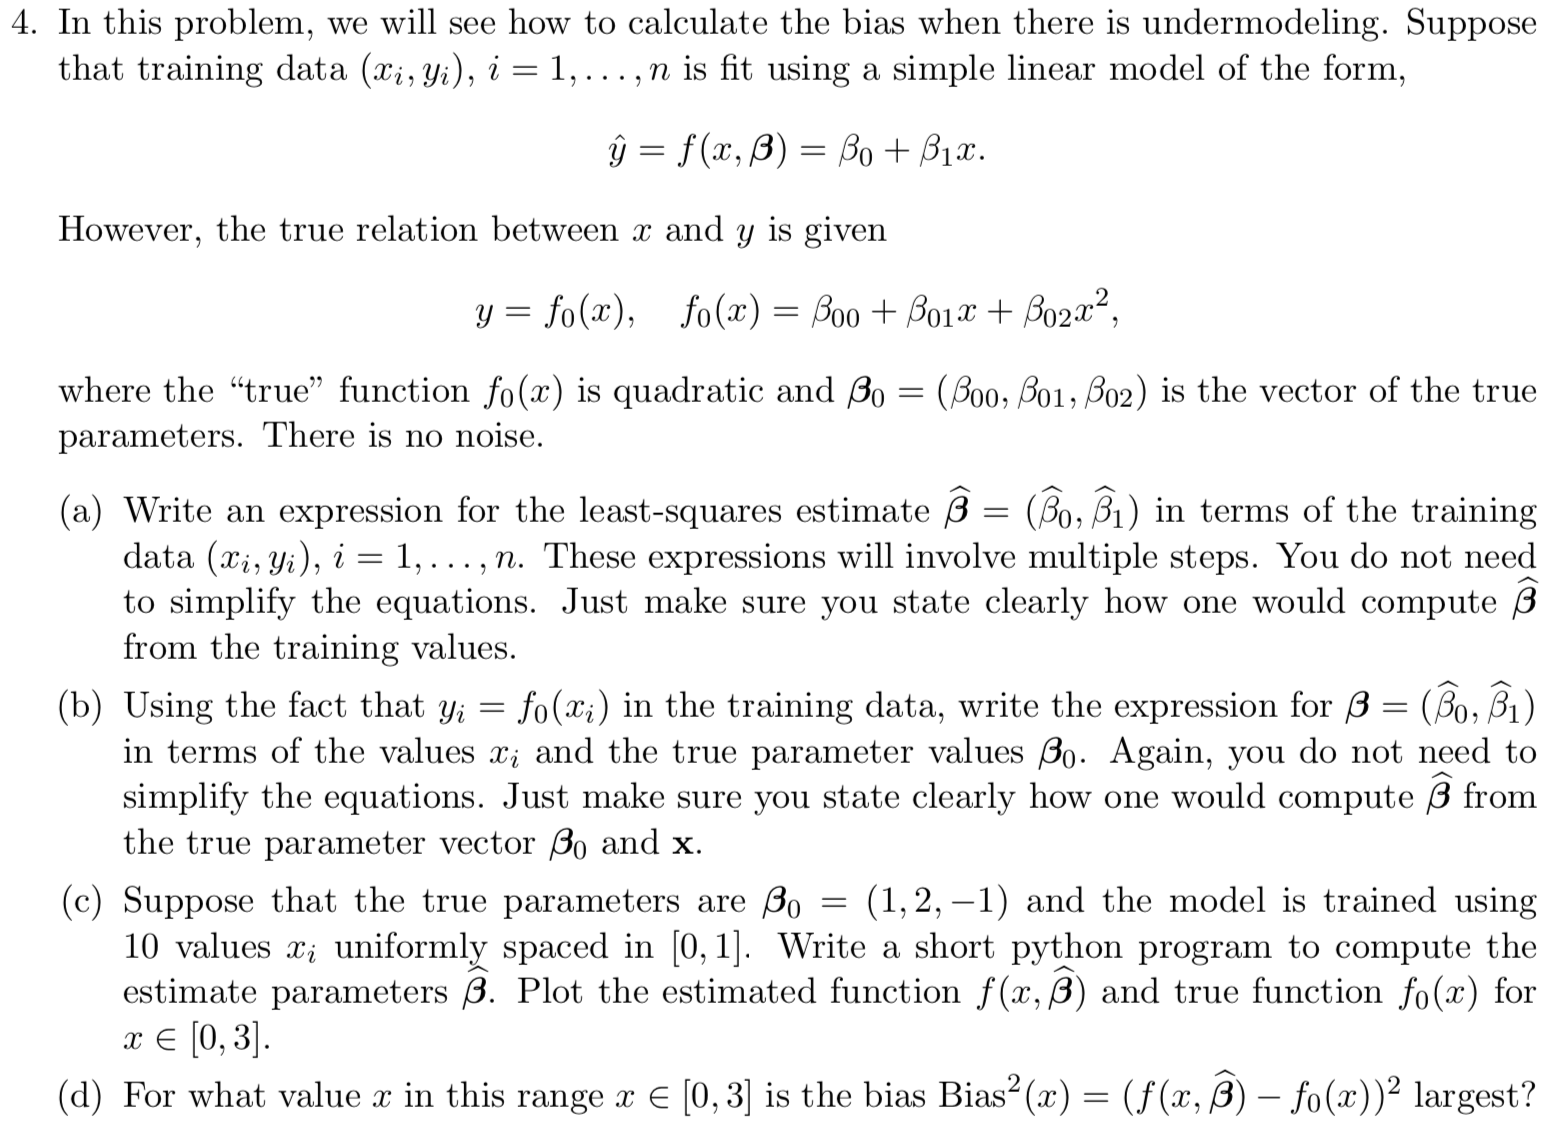

### 4a)
$$
\textbf{A} = \begin{bmatrix}
1 & x_1 \\
1 & x_2 \\
\vdots  & \vdots \\
1 & x_n \\
\end{bmatrix}_{N\times2} \\
\hat{\beta} = [\hat{\beta}_1, \hat{\beta}_2] \\
\textbf{A} \hat{\beta} = y \\
\Rightarrow
\textbf{A}^T\textbf{A}\hat{\beta} = \textbf{A}^T y \\
\hat{\beta} = (\textbf{A}^T\textbf{A})^{-1}\textbf{A}^T\textbf{A}\hat{\beta} = (\textbf{A}^T\textbf{A})^{-1}\textbf{A}^T y \\
$$

### 4b)
$$
\beta = [\beta_0, \beta_1, \beta_2] \\
\textbf{X} = \begin{bmatrix}
1 & x_1 & x_1^2 \\
1 & x_2 & x_2^2 \\
\ & \vdots \ \\
1 & x_n & x_n^2 \\
\end{bmatrix} \\
y = \textbf{X} \beta \\
$$

Insert into 4a)  
$$
\hat{\beta} = (\textbf{A}^T\textbf{A})^{-1}\textbf{A}^T y \\
= (\textbf{A}^T\textbf{A})^{-1}\textbf{A}^T \textbf{X} \beta 
$$

### 4c)

In [154]:
x = np.linspace(0,1,10)
A = np.array([x**p for p in range(2)]).T
X = np.array([x**p for p in range(3)]).T

In [155]:
A.shape, X.shape

((10, 2), (10, 3))

In [156]:
beta = np.array([1, 2, -1])

In [157]:
y = X.dot(beta)

In [158]:
beta_hat = np.linalg.inv(A.T.dot(A)).dot(A.T).dot(X).dot(beta)

In [160]:
np.random.RandomState(seed=42)
xts = np.sort(np.random.uniform(0,3,30))

In [161]:
X = np.array([xts**p for p in range(3)]).T
A = np.array([xts**p for p in range(2)]).T

In [162]:
yts = X.dot(beta)

In [163]:
yhat = A.dot(beta_hat)

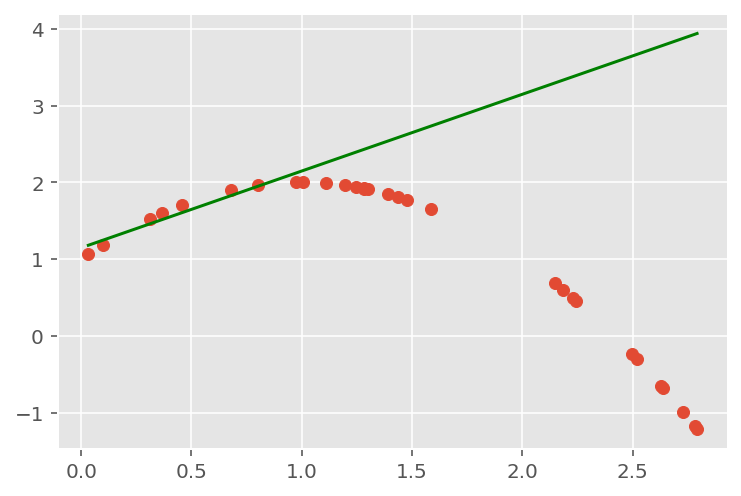

In [171]:
plt.figure()
plt.plot(xts, yhat, c='g')
plt.scatter(xts, yts)
plt.show()

### 4d)
Obviously, it can be seen that the bias is largest for x = 3.   
This is because the x value for training data is [0,1], while the test data is [0, 3]

## Problem 5

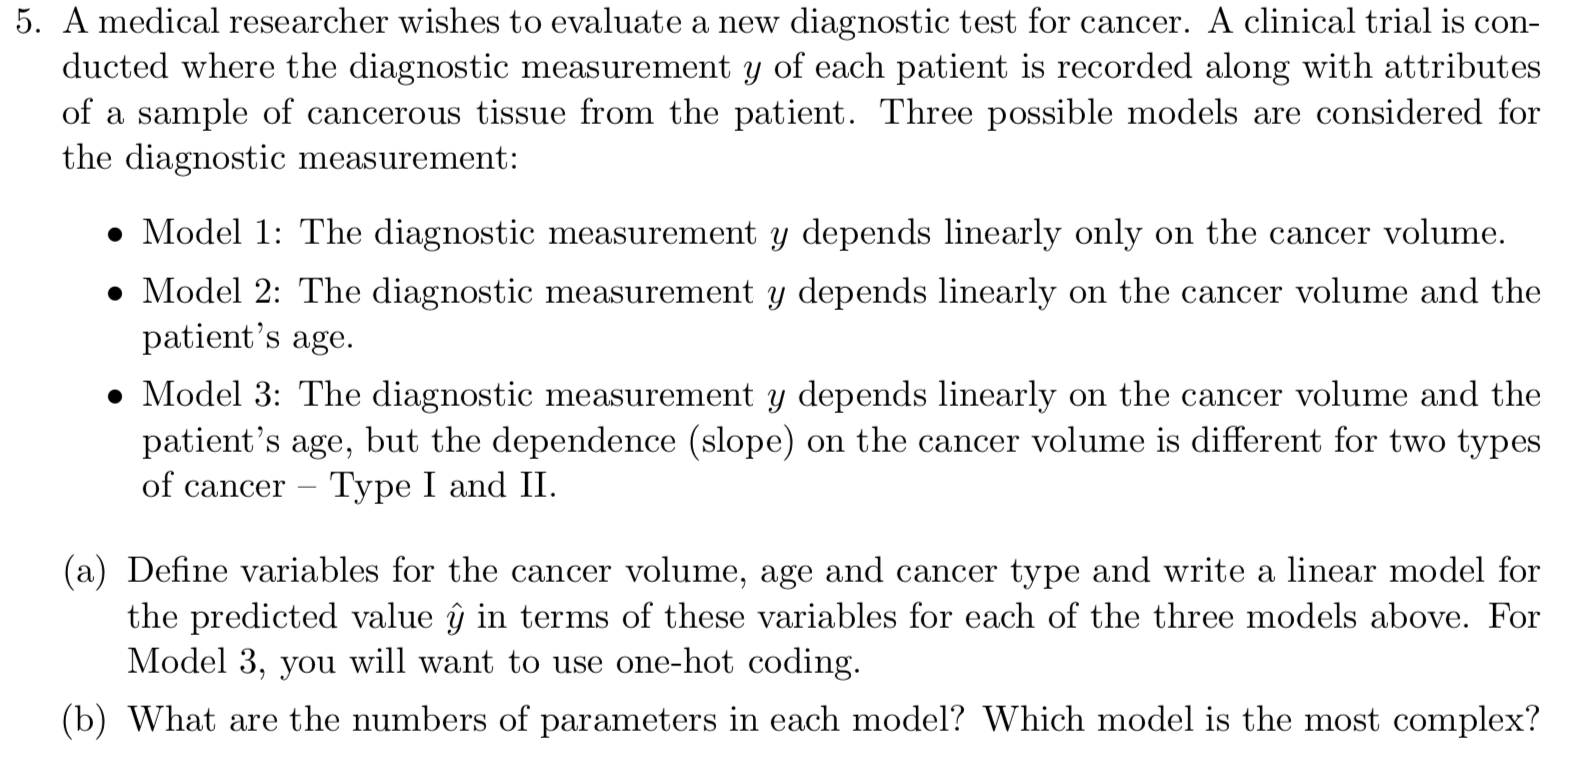

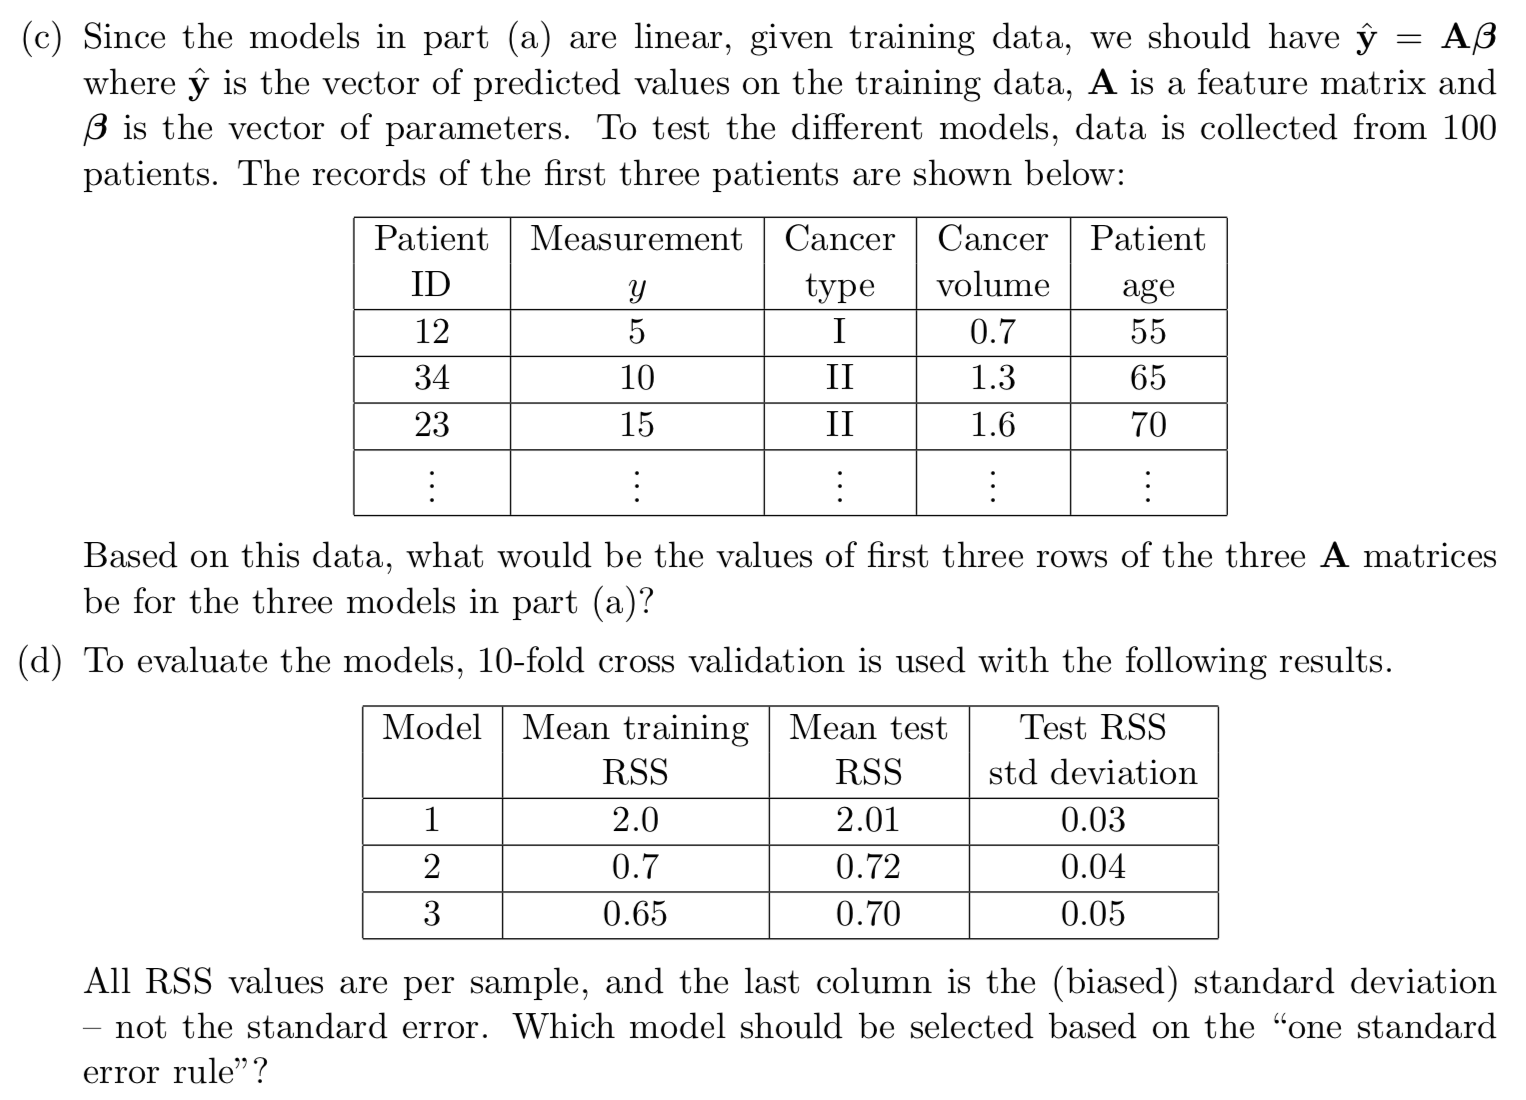

### 5a)

Let $v$ denote cancer volumn, and $a$ denote patient age.

Model 1
$$
y = \textbf{A} \beta = [1, v] \begin{bmatrix}
\beta_0 \\
\beta_1 \\
\end{bmatrix}
$$

Model 2
$$
y = \textbf{A} \beta = [1, v, a] \begin{bmatrix}
\beta_0 \\
\beta_1 \\
\beta_2 \\
\end{bmatrix}
$$

Model 3
$$
y = \textbf{A} \beta = \begin{bmatrix}1, v \cdot \text{one-hot(t)}, a \end{bmatrix}
\begin{bmatrix}
\beta_0 \\
[\beta_{10}, \beta_{11}]^T \\
\beta_2 \\
\end{bmatrix}
$$
where $[v \cdot \text{one-hot(t)}]$ is a $(2\times1)$ vector. 

### 5b)
Model 1 has 2 parameters.  
Model 2 has 3 parameters.  
Model 3 has 4 parameters.  
Model 3 is the most complex.

### 5c)
Model 1
$$
\textbf{A} = \begin{bmatrix}
1 & 0.7 \\
1 & 1.3 \\
1 & 1.6 \\
\end{bmatrix}
$$

Model 2
$$
\textbf{A} = \begin{bmatrix}
1 & 0.7 & 55\\
1 & 1.3 & 65 \\
1 & 1.6 & 70\\
\end{bmatrix}
$$

Model 3
$$
\textbf{A} = \begin{bmatrix}
1 & [0.7, 0] & 55\\
1 & [0, 1.3] & 65 \\
1 & [0, 1.6] & 70\\
\end{bmatrix}
$$

### 5d)
model 3 has the minimum RSS of 0.72
standard error 
$$
SE = std / \sqrt{K-1} = 0.05 / \sqrt{10-1} = 0.017
$$

Only model 3 has mean test RSS with the range of \[RSS_min + RSS_std, RSS_min - RSS_std\]

The souce code of this Jupyter Notebook will be uploaded to [Guandong Kou's GitHub repository](https://github.com/Kou-Guandong/NYU_6143_Machine_Learning).